# Libraries

In [104]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from time import time
import re
import string
from statistics import stdev
from pandas.plotting import scatter_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import os
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import multiprocessing
from sklearn.svm import SVC
import warnings

sns.set(style="darkgrid")
sns.set(font_scale=1.3)
pd.set_option('display.max_colwidth', None)

warnings.filterwarnings('ignore')

# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')


# Bavaria Test

1. You must generate an API query (GET) to extract the information that is hosted at:
a. GET: http://190.60.218.154:4050/dataintelligence/
b. Key ID: peru/prueba/v1

2. Note: The information is hosted at http://190.60.218.154:4050/dataintelligence/peru/prueba/v1.

In [105]:
response=requests.get('http://190.60.218.154:4050/dataintelligence/peru/prueba/v1')
data =response.json()
data1 = pd.DataFrame(data)
data1.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,{'gasto': 3.47},{'interacciones': 2.0},"{'fecha': 'Tue, 15 Oct 2019 00:00:00 GMT'}",{'moneda': 'USD'},{'id_campania': '6666070697'},{'id_conjunto_anuncios': '76484749901'},{'id_anuncio': '389396738140'},{'visitas_al_50': 862.6176},{'visitas_al_75': 651.1752},{'visitas_al100': 578.9394},{'visitas_al100': 'YouTube'},{'country': 'PE'},{'brand': 'PILSEN CALLAO'},{'objetivo': 'Video Views'},"{'objetivo': 'Mon, 14 Oct 2019 00:00:00 GMT'}",{'formato': 'Video'},{'nombre_campania': 'LITRAZO'},{'impresiones': 2106.0}
1,{'gasto': 4.49},{'interacciones': 3.0},"{'fecha': 'Fri, 15 Nov 2019 00:00:00 GMT'}",{'moneda': 'USD'},{'id_campania': '213904'},{'id_conjunto_anuncios': '1905221'},{'id_anuncio': '4460317'},{'visitas_al_50': 791.0},{'visitas_al_75': 732.0},{'visitas_al100': 699.0},{'visitas_al100': 'Oath'},{'country': 'PE'},{'brand': 'PILSEN CALLAO'},{'objetivo': 'Video Views'},"{'objetivo': 'Wed, 13 Nov 2019 00:00:00 GMT'}",{'formato': 'Video'},{'nombre_campania': 'LITRAZO'},{'impresiones': 832.0}
2,{'gasto': 4.68},{'interacciones': 8.0},"{'fecha': 'Fri, 15 Nov 2019 00:00:00 GMT'}",{'moneda': 'USD'},{'id_campania': '213904'},{'id_conjunto_anuncios': '1905224'},{'id_anuncio': '4460318'},{'visitas_al_50': 772.0},{'visitas_al_75': 728.0},{'visitas_al100': 669.0},{'visitas_al100': 'Oath'},{'country': 'PE'},{'brand': 'PILSEN CALLAO'},{'objetivo': 'Video Views'},"{'objetivo': 'Wed, 13 Nov 2019 00:00:00 GMT'}",{'formato': 'Video'},{'nombre_campania': 'LITRAZO'},{'impresiones': 866.0}


In [106]:
#to extract the colnames we will take just the first row
a=data1[:1].values.tolist()[0]
#create a list of columns
columnas=[]
for dic in a:
    key=dic.keys()
    x=list(key)[0]
    columnas.append(x)
print(x)

impresiones


In [112]:
#creating the new dataframe
data=pd.DataFrame()
n_cols=np.arange(18)
def extract_data(data_frame):
    for col,i in zip(columnas,n_cols):
        data[col+'_'+str(i)]=data1[i].apply(lambda x: x[col])

In [113]:
extract_data(data1)
data1.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,{'gasto': 3.47},{'interacciones': 2.0},"{'fecha': 'Tue, 15 Oct 2019 00:00:00 GMT'}",{'moneda': 'USD'},{'id_campania': '6666070697'},{'id_conjunto_anuncios': '76484749901'},{'id_anuncio': '389396738140'},{'visitas_al_50': 862.6176},{'visitas_al_75': 651.1752},{'visitas_al100': 578.9394},{'visitas_al100': 'YouTube'},{'country': 'PE'},{'brand': 'PILSEN CALLAO'},{'objetivo': 'Video Views'},"{'objetivo': 'Mon, 14 Oct 2019 00:00:00 GMT'}",{'formato': 'Video'},{'nombre_campania': 'LITRAZO'},{'impresiones': 2106.0}
1,{'gasto': 4.49},{'interacciones': 3.0},"{'fecha': 'Fri, 15 Nov 2019 00:00:00 GMT'}",{'moneda': 'USD'},{'id_campania': '213904'},{'id_conjunto_anuncios': '1905221'},{'id_anuncio': '4460317'},{'visitas_al_50': 791.0},{'visitas_al_75': 732.0},{'visitas_al100': 699.0},{'visitas_al100': 'Oath'},{'country': 'PE'},{'brand': 'PILSEN CALLAO'},{'objetivo': 'Video Views'},"{'objetivo': 'Wed, 13 Nov 2019 00:00:00 GMT'}",{'formato': 'Video'},{'nombre_campania': 'LITRAZO'},{'impresiones': 832.0}


In [114]:
data.rename(columns={'visitas_al100_10':'fuente_10'},inplace=True)
data.rename(columns={'objetivo_14':'fecha_de_publicacion_14'},inplace=True)
data.columns

Index(['gasto_0', 'interacciones_1', 'fecha_2', 'moneda_3', 'id_campania_4',
       'id_conjunto_anuncios_5', 'id_anuncio_6', 'visitas_al_50_7',
       'visitas_al_75_8', 'visitas_al100_9', 'fuente_10', 'country_11',
       'brand_12', 'objetivo_13', 'fecha_de_publicacion_14', 'formato_15',
       'nombre_campania_16', 'impresiones_17'],
      dtype='object')

In [115]:
#exporting the data as a csv file

data.to_csv('Test_Bavaria_data.csv')

# Read the csv generated

In [136]:
data=pd.read_csv('Test_Bavaria_data.csv')
data.head(2)

,Unnamed: 0,gasto,interacciones,fecha,moneda,id_campania,id_conjunto_anuncios,id_anuncio,visitas_al_50,visitas_al_75,visitas_al100,fuente,country,brand,objetivo,fecha_de_publicacion,formato,nombre_campania,impresiones
0,"0,3.47,2.0,""Tue, 15 Oct 2019 00:00:00 GMT"",USD,6666070697,76484749901,389396738140,862.6176,651.1752,578.9394,YouTube,PE,PILSEN CALLAO,Video Views,""Mon, 14 Oct 2019 00:00:00 GMT"",Video,LITRAZO,2106.0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"1,4.49,3.0,""Fri, 15 Nov 2019 00:00:00 GMT"",USD,213904,1905221,4460317,791.0,732.0,699.0,Oath,PE,PILSEN CALLAO,Video Views,""Wed, 13 Nov 2019 00:00:00 GMT"",Video,LITRAZO,832.0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data cleaning

After reviewing for null values by column, we found that there are only nulls in 9 columns. Therefore, we will proceed to remove them.

In [117]:

# Check for null values in each column
for column in data.columns:
    has_nulls = data[column].isnull().any()
    if has_nulls:
        print(f"There are null values in column {column}")
    else:
        print(f"No null values in column {column}")

No null values in column Unnamed: 0
No null values in column gasto_0
No null values in column interacciones_1
No null values in column fecha_2
No null values in column moneda_3
There are null values in column id_campania_4
There are null values in column id_conjunto_anuncios_5
There are null values in column id_anuncio_6
There are null values in column visitas_al_50_7
There are null values in column visitas_al_75_8
There are null values in column visitas_al100_9
No null values in column fuente_10
No null values in column country_11
No null values in column brand_12
There are null values in column objetivo_13
There are null values in column fecha_de_publicacion_14
There are null values in column formato_15
No null values in column nombre_campania_16
No null values in column impresiones_17


In [29]:
data_wt_nuls = data.dropna()

In [118]:

# Check for null values in each column after clean
for column in data.columns:
    has_nulls = data_wt_nuls[column].isnull().any()
    if has_nulls:
        print(f"There are null values in column {column}")
    else:
        print(f"No null values in column {column}")
data=data_wt_nuls


No null values in column Unnamed: 0
No null values in column gasto_0
No null values in column interacciones_1
No null values in column fecha_2
No null values in column moneda_3
No null values in column id_campania_4
No null values in column id_conjunto_anuncios_5
No null values in column id_anuncio_6
No null values in column visitas_al_50_7
No null values in column visitas_al_75_8
No null values in column visitas_al100_9
No null values in column fuente_10
No null values in column country_11
No null values in column brand_12
No null values in column objetivo_13
No null values in column fecha_de_publicacion_14
No null values in column formato_15
No null values in column nombre_campania_16
No null values in column impresiones_17


In [119]:
# Calculate the Interquartile Range (IQR) for each column
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Detect outliers for each column
outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any()

# Print the results
for column, has_outliers in outliers.iteritems():
    if has_outliers:
        print(f"Column {column} has outliers.")
    else:
        print(f"Column {column} does not have outliers.")

Column Unnamed: 0 does not have outliers.
Column brand_12 does not have outliers.
Column country_11 does not have outliers.
Column fecha_2 does not have outliers.
Column fecha_de_publicacion_14 does not have outliers.
Column formato_15 does not have outliers.
Column fuente_10 does not have outliers.
Column gasto_0 has outliers.
Column id_anuncio_6 has outliers.
Column id_campania_4 does not have outliers.
Column id_conjunto_anuncios_5 does not have outliers.
Column impresiones_17 has outliers.
Column interacciones_1 has outliers.
Column moneda_3 does not have outliers.
Column nombre_campania_16 does not have outliers.
Column objetivo_13 does not have outliers.
Column visitas_al100_9 has outliers.
Column visitas_al_50_7 has outliers.
Column visitas_al_75_8 has outliers.


For the columns where it makes sense to remove outliers, such as the "gastos" column, we will proceed to eliminate them.

<AxesSubplot:xlabel='gasto_0'>

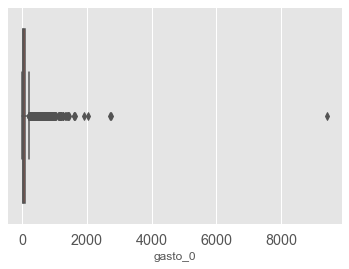

In [120]:
# checking atipical data from de expenses
sns.boxplot(data.gasto_0)

(array([7.374e+03, 3.600e+01, 4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([1.77000000e-03, 9.41883593e+02, 1.88376542e+03, 2.82564724e+03,
        3.76752906e+03, 4.70941088e+03, 5.65129271e+03, 6.59317453e+03,
        7.53505635e+03, 8.47693818e+03, 9.41882000e+03]),
 <BarContainer object of 10 artists>)

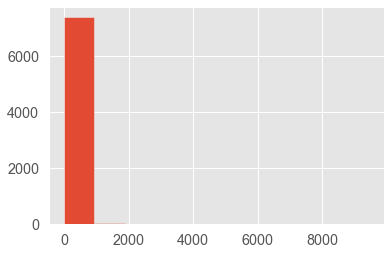

In [121]:
plt.hist(data.gasto_0)

<AxesSubplot:xlabel='gasto_0'>

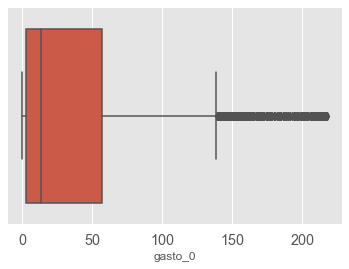

In [122]:
q1 = data['gasto_0'].quantile(0.25)
q3 = data['gasto_0'].quantile(0.75)
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Filter the DataFrame to remove outliers in the specific column
data_filtered = data[(data['gasto_0'] >= lower_bound) & (data['gasto_0'] <= upper_bound)]
sns.boxplot(data_filtered.gasto_0)


(array([3755.,  815.,  506.,  460.,  312.,  194.,  167.,  137.,   73.,
         109.]),
 array([1.77000000e-03, 2.17375930e+01, 4.34734160e+01, 6.52092390e+01,
        8.69450620e+01, 1.08680885e+02, 1.30416708e+02, 1.52152531e+02,
        1.73888354e+02, 1.95624177e+02, 2.17360000e+02]),
 <BarContainer object of 10 artists>)

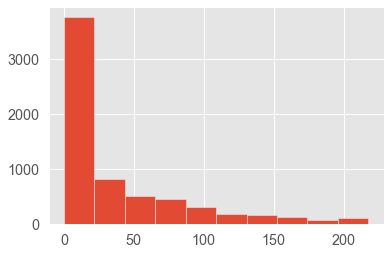

In [123]:
plt.hist(data_filtered.gasto_0)

# Data Analysis

In [124]:
column_stats = data_filtered.describe()

# Print the descriptive statistics for each column
print(column_stats)

         Unnamed: 0      gasto_0  interacciones_1  id_anuncio_6  \
count   6528.000000  6528.000000      6528.000000  6.528000e+03   
mean    6261.465533    37.333850       208.865502  3.342151e+16   
std     4415.038998    49.551625       596.396637  1.725682e+17   
min        0.000000     0.001770         0.000000  3.503220e+05   
25%     1689.750000     2.710000         2.000000  4.298560e+06   
50%     8337.500000    13.240000        15.000000  3.870211e+11   
75%    10262.250000    57.077500        85.000000  2.384395e+16   
max    12242.000000   217.360000      7184.000000  1.212157e+18   

       visitas_al_50_7  visitas_al_75_8  visitas_al100_9  impresiones_17  
count      6528.000000      6528.000000      6528.000000     6528.000000  
mean       5238.765121      4768.956817      4448.902024    32264.913756  
std       16270.875305     15799.814695     15510.641450    72402.448923  
min           0.000000         0.000000         0.000000        1.000000  
25%           0.00000

In [134]:
print("Number of advertisements:",len(data.id_anuncio_6.unique()))
print("Number of advertisement sets:",len(data.id_conjunto_anuncios_5.unique()))
print("Number of campaigns:",len(data.id_campania_4.unique()))

Number of advertisements: 650
Number of advertisement sets: 403
Number of campaigns: 192


In [127]:
numeric=['gasto_0','interacciones_1','visitas_al_50_7','visitas_al_75_8','visitas_al100_9','impresiones_17' ]
categoric=['brand_12','objetivo_13','fuente_10']
df_numeric=data[numeric]

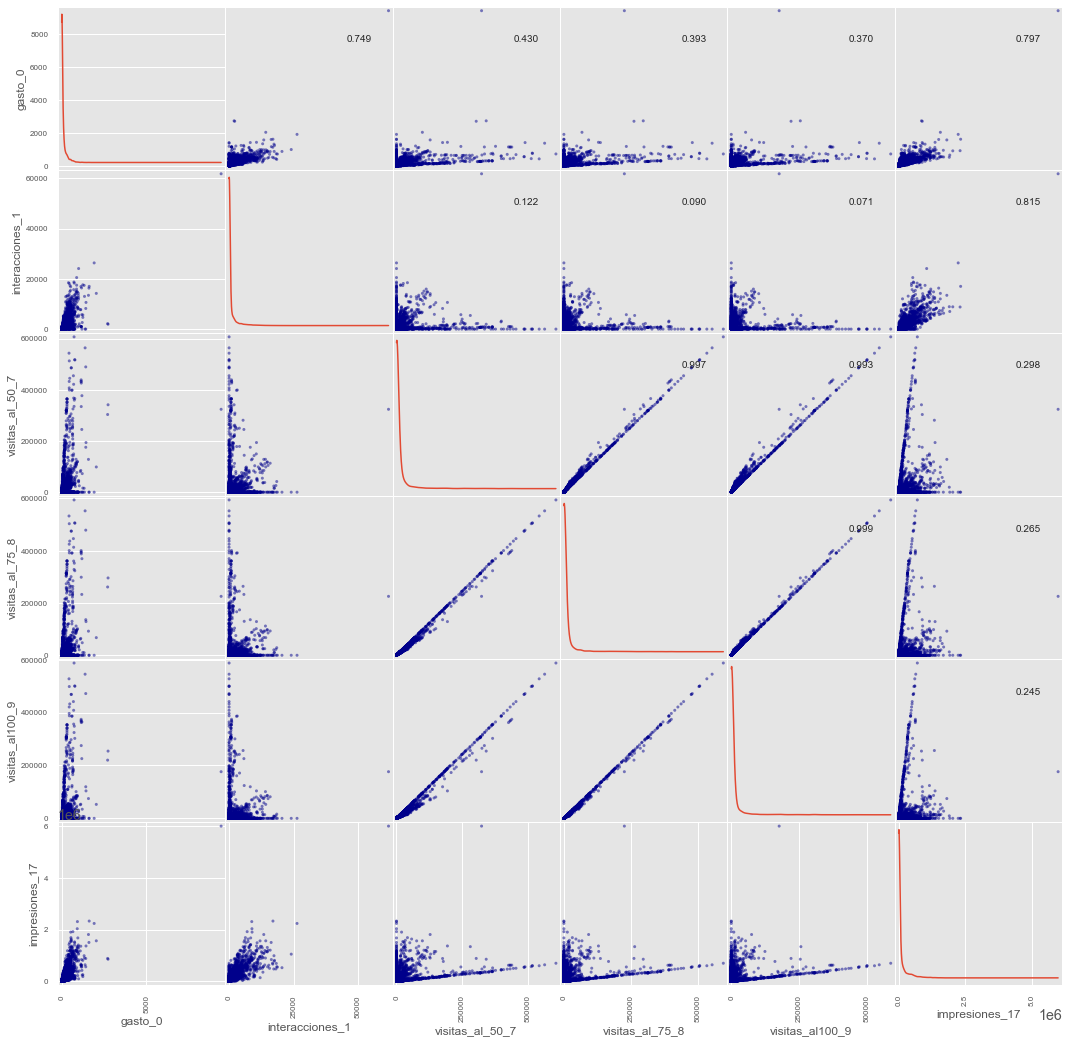

In [128]:
axes = scatter_matrix(df_numeric, alpha=0.5, diagonal='kde',color="Darkblue",figsize=(18,18))
corr=pd.DataFrame(df_numeric.corr()).values
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

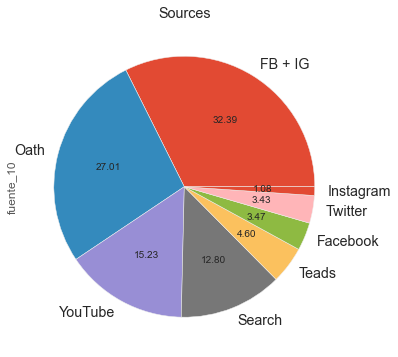

In [129]:
plot = data['fuente_10'].value_counts().plot(kind='pie', autopct='%.2f', 
                                            figsize=(6, 6),
                                            title='Sources')

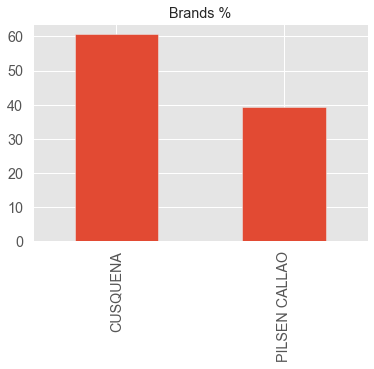

In [130]:
plot = (100 * data['brand_12'].value_counts() / len(data['brand_12'])).plot(
kind='bar', title='Brands %')

In [131]:
# function than describes a numeric variable into categories
def descriptive(col,category=None):
    ax = sns.boxplot(x=col, y=category ,data=data)
    ax=ax.set_title(' distribution of  '+ str(col)+ ' for '+  str(category))
    plt.ylabel(category)
    plt.xlabel(col)
    plt.show()
    print('-'*50)
    print('descriptive statistic: '+ str(col))
    print('-'*50)
    if category==None:
        df_est=data[col].describe()
        #df_est['cv']=round(100*df_est['std']/df_est['mean'],1)
    else:
        df_est=data.groupby(category)[col].describe().round(1)
        df_est['cv']=round(100*df_est['std']/df_est['mean'],1)
    print(df_est)
    

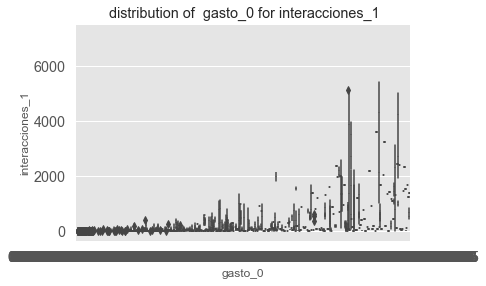

--------------------------------------------------
descriptive statistic: gasto_0
--------------------------------------------------
                  count   mean   std    min    25%    50%    75%    max     cv
interacciones_1                                                               
0.0              1002.0    6.6  23.3    0.0    0.0    0.4    2.7  170.3  353.0
1.0               482.0    3.4   8.4    0.0    0.3    0.8    3.8  137.0  247.1
2.0               275.0    6.3  12.2    0.0    0.7    2.9    6.1  126.2  193.7
3.0               241.0    7.6  12.2    0.0    1.0    2.8    7.8   86.6  160.5
4.0               200.0    9.7  13.2    0.1    1.5    4.4   11.0   82.0  136.1
...                 ...    ...   ...    ...    ...    ...    ...    ...    ...
5951.0              1.0  203.2   NaN  203.2  203.2  203.2  203.2  203.2    NaN
6035.0              1.0  188.2   NaN  188.2  188.2  188.2  188.2  188.2    NaN
6566.0              1.0  201.9   NaN  201.9  201.9  201.9  201.9  201.9    Na

<AxesSubplot:>

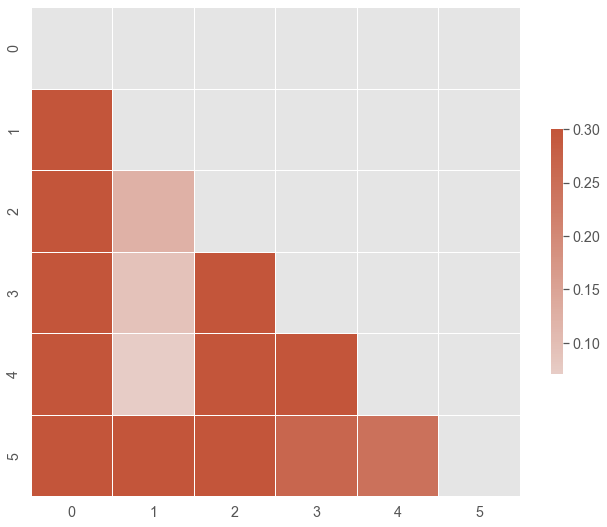

In [132]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})